In [1]:
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from brier_score import brier_skill_plot, brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS

2024-03-05 10:52:01.603175: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 10:52:01.629617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 10:52:01.629637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 10:52:01.630418: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 10:52:01.634643: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 10:52:01.635110: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
neighbourhood_size = 11
parameter_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']
ignore = ['229', '285', '323']
train_folds = [1, 2]
train_data = get_normalized_tensor(neighbourhood_size, parameter_names, train_folds, ignore)

X_train = train_data['X']
y_train = train_data['y']
variances_train = train_data['variances']
mean_train = train_data['mean']
std_train = train_data['std']


print(X_train.shape)

(15733, 5)


In [3]:
test_fold = 3

X_test, y_test, variances_test = get_tensors(neighbourhood_size, parameter_names, test_fold, ignore)
X_test = (X_test - mean_train) / std_train

print(X_test.shape)

(7780, 5)


In [4]:
setup = {}

setup["num_features"] = len(parameter_names)
setup["feature_mean"] = mean_train
setup["feature_std"] = std_train
setup["features"] = parameter_names
setup["neighbourhood_size"] = neighbourhood_size

In [5]:
setup1 = setup

setup1["loss"] = "loss_CRPS_sample"
setup1["samples"] = 100
setup1["optimizer"] = "Adam"
setup1["learning_rate"] = 0.01
setup1["forecast_distribution"] = "distr_trunc_normal"

trunc_normal_crps = EMOS(setup1)

Using default parameters for truncated normal distribution


In [6]:
epochs = 300
trunc_normal_crps.fit(X_train, y_train, variances_train, epochs, True)

Step: 0, Loss: 1.6883008480072021
Step: 1, Loss: 1.6662862300872803
Step: 2, Loss: 1.6432406902313232
Step: 3, Loss: 1.6200432777404785
Step: 4, Loss: 1.5990031957626343
Step: 5, Loss: 1.5782463550567627
Step: 6, Loss: 1.5610617399215698
Step: 7, Loss: 1.5437023639678955
Step: 8, Loss: 1.5264198780059814
Step: 9, Loss: 1.510314702987671
Step: 10, Loss: 1.4963035583496094
Step: 11, Loss: 1.4833961725234985
Step: 12, Loss: 1.4701125621795654
Step: 13, Loss: 1.4571635723114014
Step: 14, Loss: 1.4432464838027954
Step: 15, Loss: 1.4332988262176514
Step: 16, Loss: 1.4216610193252563
Step: 17, Loss: 1.410881757736206
Step: 18, Loss: 1.3993719816207886
Step: 19, Loss: 1.3881255388259888
Step: 20, Loss: 1.3777860403060913
Step: 21, Loss: 1.3673980236053467
Step: 22, Loss: 1.3564146757125854
Step: 23, Loss: 1.3431036472320557
Step: 24, Loss: 1.3342841863632202
Step: 25, Loss: 1.3214737176895142
Step: 26, Loss: 1.3128485679626465
Step: 27, Loss: 1.3033281564712524
Step: 28, Loss: 1.29298710823059

[<tf.Tensor: shape=(), dtype=float32, numpy=1.6883008>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.6662862>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.6432407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.6200433>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5990032>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5782464>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5610617>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5437024>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5264199>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5103147>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.4963036>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.4833962>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.4701126>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.4571636>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.4432465>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.4332988>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.421661>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.410

There are 104 values in the PIT histogram


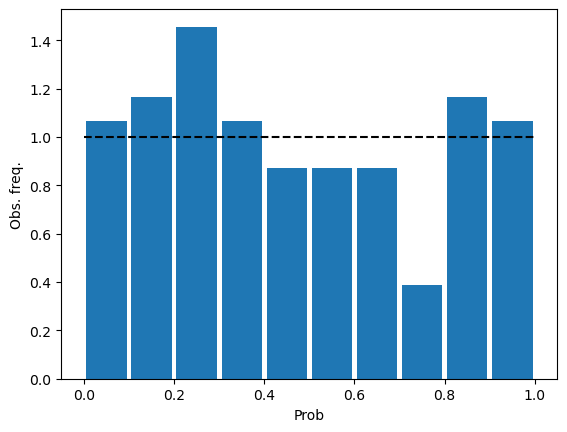

In [13]:
t = 15
bins = 10
make_cpit_hist_emos(trunc_normal_crps, X_test, y_test, variances_test, t=t, bins = bins)
